## Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable (also called the target variable) and one or more independent variables (predictors or features). The goal is to find the best-fit line that minimizes the sum of squared differences between the predicted and actual values of the dependent variable. This line is represented by the equation:
$$Y \space = \space w_0 + w_1X_1 + w_2X_2 + ... + w_nX_n$$

where:
- $Y$ is the dependent variable.
- $X_1, X_2, ..., X_n$ are the independent variable.
- $w_0$ is the bias (y-intercept)
- $w_1, w_2, ..., w_n$ are the coefficients

The goal of the linear regression is to find the values of $w_0, w_1, w_2, ..., w_n$ that minimize the sum of squared differences between the predicted ($Y_pred$) and actual ($Y_actual$) values:

$\text{minimize } \sum_{i=1}^m(Y_{pred} - Y_{actual})^2$ where $m$ is the number of data points.


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

In [2]:
# Load the dataset
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [5]:
# Model fitting
model = LinearRegression()
model.fit(X_train, y_train)

# Model prediction
y_preds = model.predict(X_test)

# Check the parameters
print('Bias:', model.intercept_)
print('Coeffcients:', model.coef_)

Bias: -37.02327770606391
Coeffcients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]


In [6]:
print('Mean Squared Error:', mean_squared_error(y_test, y_preds))

Mean Squared Error: 0.5558915986952422


## Logistic Regression
Logistic Regression is a binary classification algorithm used for predicting the probability that an instance belongs to a particular category. Unlike linear regression, logistic regression uses the logistic function (sigmoid) to squash the output into the range (0, 1). The logistic regression equation is given by:
$$P(Y=1) = \frac{1}{1 + e^{-(w_0 + w_1X_1 + w_2X_2 + ... + w_nX_n)}}$$

Here $P(Y=1)$ is the probability of the positive class, and $e$ is the base natural logarithm,

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

Text(0.5, 1.0, 'Sigmoid function')

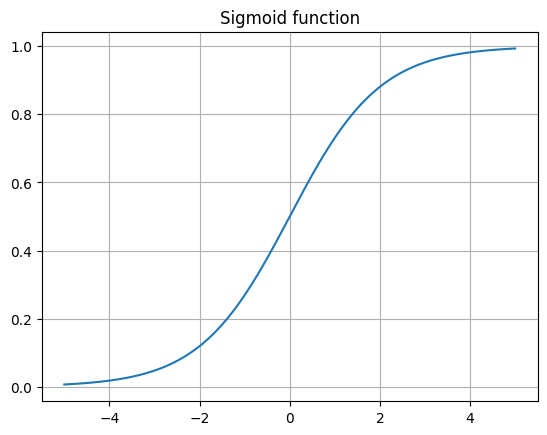

In [42]:
X = np.linspace(-5, 5, 10 ** 4)
y = 1 / (1 + np.exp(-X))

plt.plot(X, y)
plt.grid()
plt.title('Sigmoid function')

In [24]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [35]:
model.intercept_, model.coef_

(array([  9.03250813,   1.8426525 , -10.87516064]),
 array([[-0.39722222,  0.96078798, -2.37395779, -1.00329173],
        [ 0.51294154, -0.25372598, -0.21560233, -0.76901609],
        [-0.11571932, -0.707062  ,  2.58956012,  1.77230782]]))

## K-Nearest Neighbors

The KNN algorithm is a simple and intuitive ML algorithm used for both regression and classification tasks. Given a new data point, it predicts its class or value based on majority class or average of K-nearest data points in the feature space.

* **Classification**
  For classification, the prediction is based by the majority vote of the K-Nearest neighbors. If $x$ is the the input data point and $y_i$ is the class label of data point $x_i$, the predicted class label $y$ for $x$ is:
  $$y = \text{argmax}_j \sum_{i=1}^K I(y_i = j)$$

  where $I(.)$ is the indicator function.

* **Regression**
  For regression, the prediction is the average of the values of the K-Nearest neighbors. If $x$ is the input data point and $y_i$ is the value of data point $x_i$, the predicted value $y$ for $x$ is:
  $$y = \frac{1}{K} \sum_{i=1}^{K}y_i$$

In [1]:
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [4]:
prices = fetch_california_housing()
X, y = prices.data, prices.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regr = KNeighborsRegressor(n_neighbors=3)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 1.1694144088518572
